In [32]:
#Importing libraries
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
import random
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory, plot_tools
from scipy.integrate import odeint

#Numerical neurons parameters for the project
V_REST = 15 * b2.mV
V_RESET = -50 * b2.mV
MEMBRANE_RESISTANCE = 50 * b2.ohm
MEMBRANE_TIME_SCALE = 10 * b2.ms
FIRING_THRESHOLD = 0 * b2.mV
#ABSOLUTE_REFRACTORY_PERIOD 2 ms by default here ?
BETA = 100000 * b2.Hz #mHz do not exist, code it for 100 mHz instead ?

# Ex 0

(<AxesSubplot: ylabel='Input current [A] \n min: -0.0004755282581475782 \nmax: 0.0004755282581475776'>,
 <AxesSubplot: xlabel='t [ms]', ylabel='membrane voltage [mV]\n min: -0.05\n max: 0.015'>)

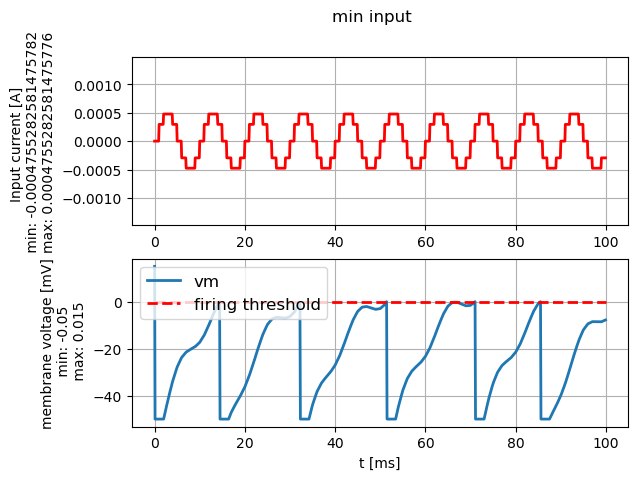

In [15]:
sinusoidal_current = input_factory.get_sinusoidal_current(0, 100, unit_time=b2.ms,
                                            amplitude= 0.5 * b2.mamp, frequency=100*b2.Hz,
                                            direct_current=0. * b2.namp)
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 100 * b2.ms, v_rest=V_REST, v_reset= V_RESET, firing_threshold=FIRING_THRESHOLD, membrane_resistance=MEMBRANE_RESISTANCE, membrane_time_scale=MEMBRANE_TIME_SCALE)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, sinusoidal_current, title="min input", firing_threshold=FIRING_THRESHOLD)

In [77]:
N = 100
Vi = np.random.uniform(V_RESET,FIRING_THRESHOLD,100)
''' A refaire nous même 
sinusoidal_current = input_factory.get_sinusoidal_current(0, 100, unit_time=b2.ms,
                                            amplitude= 0.5 * b2.mamp, frequency=100*b2.Hz,
                                            direct_current=0. * b2.namp)

(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 100 * b2.ms, v_rest=V_REST, v_reset= V_RESET, firing_threshold=FIRING_THRESHOLD, membrane_resistance=MEMBRANE_RESISTANCE, membrane_time_scale=MEMBRANE_TIME_SCALE)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, sinusoidal_current, title="min input", firing_threshold=FIRING_THRESHOLD)
'''

' A refaire nous même \nsinusoidal_current = input_factory.get_sinusoidal_current(0, 100, unit_time=b2.ms,\n                                            amplitude= 0.5 * b2.mamp, frequency=100*b2.Hz,\n                                            direct_current=0. * b2.namp)\n\n(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 100 * b2.ms, v_rest=V_REST, v_reset= V_RESET, firing_threshold=FIRING_THRESHOLD, membrane_resistance=MEMBRANE_RESISTANCE, membrane_time_scale=MEMBRANE_TIME_SCALE)\n\n# plot I and vm\nplot_tools.plot_voltage_and_current_traces(\nstate_monitor, sinusoidal_current, title="min input", firing_threshold=FIRING_THRESHOLD)\n'

## EX 0

In [291]:
def Iext(t, I0 = 0.5 * b2.mamp, w = 100*b2.Hz, unit_time=b2.ms):
    return I0*(1+np.sin(w*t*unit_time))

def f(y, t, spike_train, step):
        # TO DO: check that binomial is the rigth approach
    #y+=np.random.binomial(1,BETA*(y*b2.mV>FIRING_THRESHOLD)*0.1)#(V_RESET-y*b2.mV)
    for i,v in enumerate(y):
        #print(BETA*(v*b2.mV>FIRING_THRESHOLD)*1*b2.ms)
        # TO DO: check the actual probability, BETA*(v*b2.mV>FIRING_THRESHOLD)*1*b2.ms takes values larger than 1, it's not a probability
        if np.random.binomial(1,BETA*(v*b2.mV>FIRING_THRESHOLD)*1*b2.ms>1)*(V_RESET-v*b2.mV):
            y[i] = V_RESET
            #print(i,t)
            spike_train[i][step]= True
        else:
            spike_train[i][step]=  True
    step+=1 #Doesn't work, always 2
    dydt = -((y*b2.mV-V_REST)+MEMBRANE_RESISTANCE*Iext(t))/MEMBRANE_TIME_SCALE
    return dydt


def non_interacting(vi, T=100*b2.ms,unit_time=b2.ms):
    steps = int(T/unit_time)+1    
    spike_train = np.zeros((len(Vi), steps)).astype(bool)
    # Set the initial condition and time points
    t = np.arange(0, steps, 1)
    # Solve the ODE using odeint
    return odeint(f, vi, t, args=(spike_train,1)), spike_train

In [292]:
Vs, ST = non_interacting(Vi)

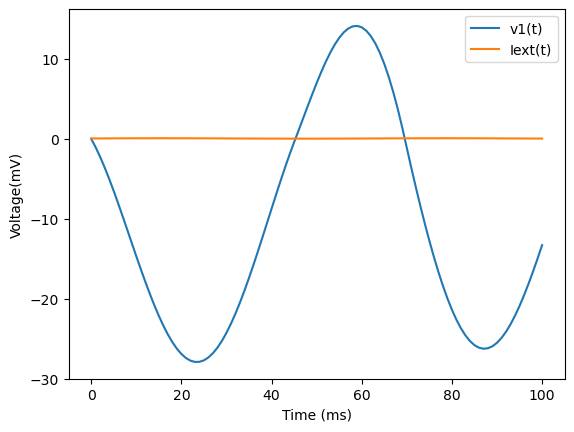

In [293]:
steps = 100+1
t = np.arange(0, steps, 1)
Ie = Iext(t)*MEMBRANE_RESISTANCE

plt.plot(t, Vs[:, 0], label='v1(t)')
plt.plot(t, Ie, label='Iext(t)')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage(mV)')
plt.legend()
plt.show()

In [294]:
plt.scatter(Vs[:, 0])

TypeError: scatter() missing 1 required positional argument: 'y'